# Maximizing Revenue in Taxi Services through Payment Type Analysis 

## Problem Statement
In the dynamic taxi booking sector, optimizing revenue generation is vital. This study investigates whether different payment methods influence taxi fares, utilizing statistical analysis to potentially guide customers towards more profitable payment options without degrading the service quality.

## Objective
The primary aim of this project is to conduct an A/B test to analyze the correlation between total fares and payment methods. We use hypothesis testing and statistical analysis in Python to determine if there is a significant difference in fares associated with credit card payments versus cash payments.

## Research Question
Does the payment method correlate with the total fare amount? Can we encourage customers to use payment methods that potentially generate higher revenue for drivers without negatively impacting their experience?


In [162]:
#importing all the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [163]:
#importing the required dataset
data=pd.read_csv("/Users/shrutiparulekar/Desktop/PROJECTS/yellow_tripdata_2020-01.csv")

In [164]:
#checking the dataset 
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [165]:
#checking the shape of the dataset
data.shape

(6405008, 18)

In [166]:
#checking the types of the fields in the dataset
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [167]:
#Converting two necessary columns into datetime
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


In [168]:
#Calculating the duration column as it is necessay for analysis 
data['duration']=data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']
data['duration (min seconds)']=data['duration'].dt.total_seconds()/60

In [169]:
#Dropping the column which is extra
data.drop(columns=['duration'], inplace=True)

In [170]:
#Filtering the dataset with only required fields
df=data[['passenger_count','payment_type','fare_amount','trip_distance','duration (min seconds)']]

In [171]:
#Checking the new dataset
df

,passenger_count,payment_type,fare_amount,trip_distance,duration (min seconds)
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [173]:
#Checking the null values in the dataset
df.isnull().sum()

passenger_count           65441
payment_type              65441
fare_amount                   0
trip_distance                 0
duration (min seconds)        0
dtype: int64

In [174]:
(65441/len(df))*100 #Checking the percentage of null values out of the entire dataset
                    # It's just 1% so we can drop easily 

1.021716132126611

In [175]:
#Dropping the null values
df.dropna(inplace=True)

In [176]:
#Changing the type of the columns from the float to integer type
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [177]:
#Find duplicates 
duplicate_rows = df[df.duplicated()]
duplicate_rows

,passenger_count,payment_type,fare_amount,trip_distance,duration (min seconds)
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [178]:
#Dropping the duplicate values as they do not add much value
df.drop_duplicates(inplace=True)

In [179]:
#Checking the shape of the new dataset formed
df.shape

(3007861, 5)

In [180]:
# passenger count distribution
df['passenger_count'].value_counts(normalize = True)


1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [181]:
df['payment_type'].value_counts(normalize = True)


1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

#### Centering the data around card and cash payments and filtering the rest of the data <br>Passeneger count keeping from 1 to 3 as greater than 3 don't add much value to the dataset.

In [182]:
# Filter data to include only payment types 'card' (1) and 'cash' (2)
filtered_data = df[df['payment_type'].isin([1, 2])]

# Filter passenger count to include values ranging from 1 to 5
filtered_data = filtered_data[(filtered_data['passenger_count'] >= 1) & (filtered_data['passenger_count'] <= 5)]


In [183]:
filtered_data

,passenger_count,payment_type,fare_amount,trip_distance,duration (min seconds)
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [184]:
#Replacing the payment type columns 1,2 by card and cash
filtered_data['payment_type'].replace([1,2],['Card','Cash'], inplace = True)


In [185]:
filtered_data

,passenger_count,payment_type,fare_amount,trip_distance,duration (min seconds)
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [186]:
filtered_data.describe()

,passenger_count,fare_amount,trip_distance,duration (min seconds)
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [187]:
# filtering the records for only positive values
filtered_data = filtered_data[filtered_data['fare_amount']>0]
filtered_data = filtered_data[filtered_data['trip_distance']>0]
filtered_data = filtered_data[filtered_data['duration (min seconds)']>0]

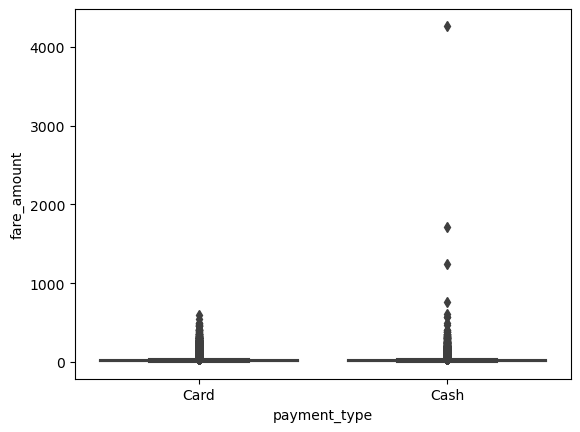

In [188]:
# check for the outliers
sns.boxplot(data=filtered_data, y="fare_amount", x="payment_type")
plt.show()

In [189]:
# remove the outliers using the IQR 
for col in ['trip_distance','fare_amount','duration (min seconds)']:
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

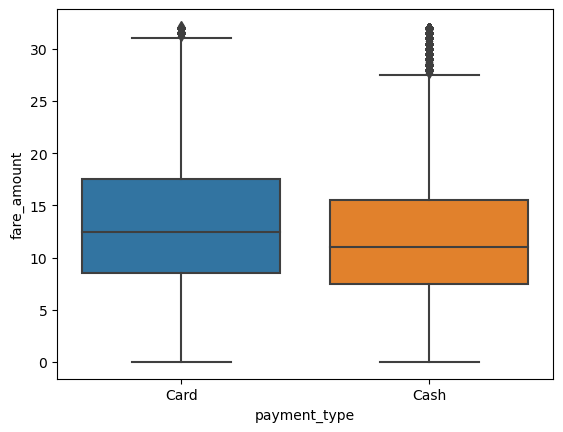

In [190]:
# check for the outliers after removing them
sns.boxplot(data=filtered_data, y="fare_amount", x="payment_type")
plt.show()

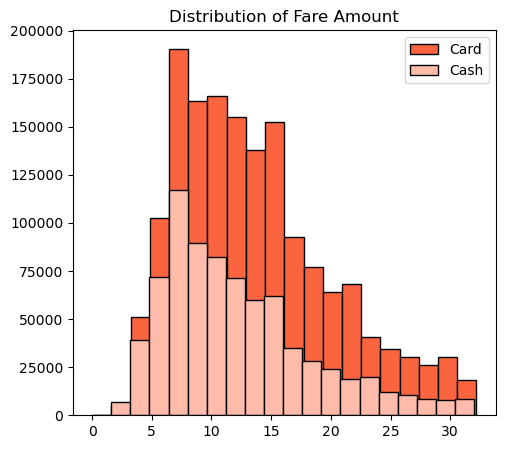

In [191]:
#plotting the relationship between card and fare_amount
#plotting the relationship between cash and fare_amount

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(filtered_data[filtered_data['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(filtered_data[filtered_data['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()


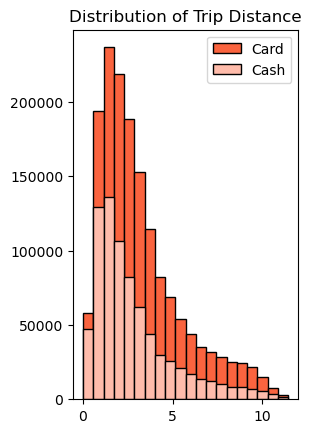

In [192]:
#plotting the relationship between card and cash with trip distance
plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(filtered_data[filtered_data['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#FA643F',label = 'Card')
plt.hist(filtered_data[filtered_data['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()
plt.show()


In [193]:
# calculating the mean and standard deviation group by on payment type 
filtered_data.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.701903  6.506356      3.230729  2.320528
Cash           12.250209  6.246104      2.803716  2.231871

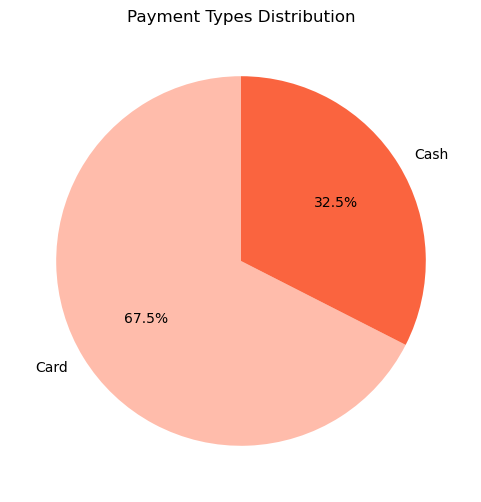

In [194]:
# Count the occurrences of each payment type
payment_counts = filtered_data['payment_type'].value_counts()

# Create labels for the pie chart
labels = payment_counts.index.tolist()

# Create data for the pie chart
sizes = payment_counts.values.tolist()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#FFBCAB', '#FA643F'], startangle=90)

# Add title
plt.title('Payment Types Distribution')

# Show the pie chart
plt.show()


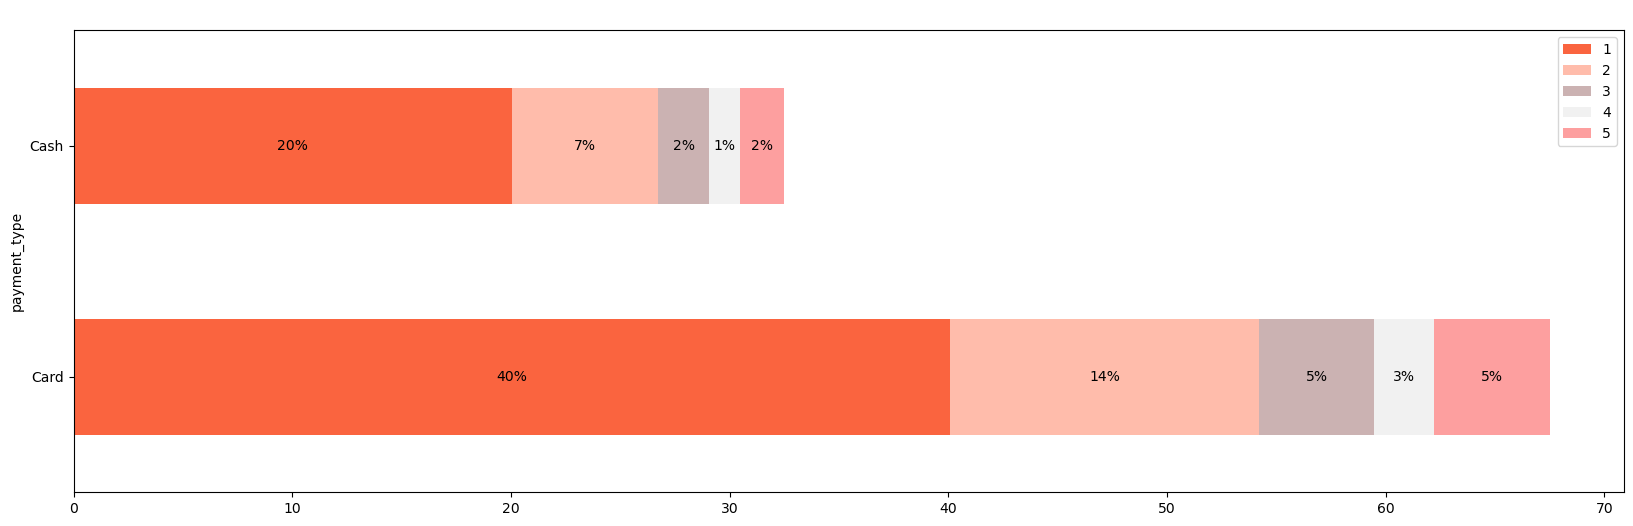

In [195]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = filtered_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20, 6)) 
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'] )

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

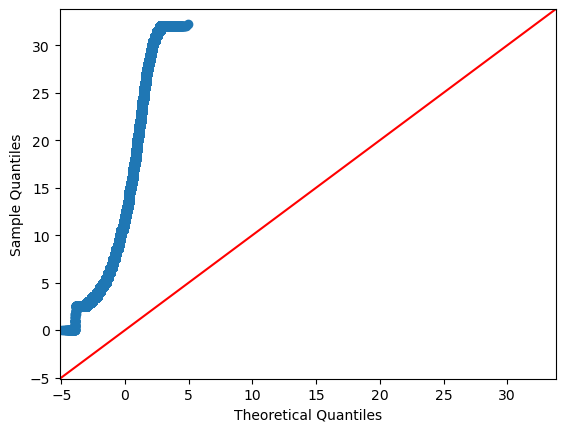

In [196]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(filtered_data['fare_amount'], line='45')
plt.show()

#there is no normal distribution and hence we use t test and not z score


## Hypothesis testing

### Null hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash. <br>  Alternative hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash

In [197]:
# sample 1
credit_card = filtered_data[filtered_data['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = filtered_data[filtered_data['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 165.59915491544626, P-value: 0.0

Reject the null hypothesis


### Conclusion 

There is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

## Linear regression

Checking the relationship between fare_amount and duration 

In [198]:
from sklearn.linear_model import LinearRegression

# Extracting features (duration) and target variable (fare_amount)
X = filtered_data[['duration (min seconds)']]
y = filtered_data['fare_amount']

# Initialize linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: 2.1716490193191245
Coefficient: [0.73729545]


In [199]:
# Add constant to the features
X = sm.add_constant(X)

# Initialize and fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 6.516e+06
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:04:18   Log-Likelihood:            -6.2424e+06
No. Observations:             2378218   AIC:                         1.248e+07
Df Residuals:                 2378216   BIC:                         1.248e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

## Conclusion

The coefficient for the duration variable is approximately 0.7373, with a standard error of 0.000. This indicates that, on average, for every one-unit increase in duration (in minutes or seconds), the fare amount is expected to increase by approximately 0.7373 units. This relationship is statistically significant (p-value < 0.05), suggesting that there is a strong positive effect of duration on fare amount.